#**Exploratory Analysis of U.S. County Childcare cost 2008 to 2018**
A1 Team6:
*   Yuanhao Li
*   Junqi Fang
*   Xinying Wang
*   Zexuan Wang



## 1.Data importing & Instructure

We load childcare datasets from Github and exam the overall structure of our dataset.

In [ ]:
import pandas as pd

CHILDCARE_URL = "https://raw.githubusercontent.com/paddington-L831/BA820-Unsupervised-and-Unstructured-Machine-Learning/refs/heads/main/childcare_costs.csv"
COUNTIES_URL = "https://raw.githubusercontent.com/paddington-L831/BA820-Unsupervised-and-Unstructured-Machine-Learning/refs/heads/main/counties.csv"

# Load datasets and merge
childcare = pd.read_csv(CHILDCARE_URL)
counties = pd.read_csv(COUNTIES_URL)

df = childcare.merge(counties, on="county_fips_code", how="left")

print("childcare shape:", childcare.shape)
print("counties shape:", counties.shape)
print("df shape:", df.shape)
print(df.dtypes)

df.head()

childcare shape: (34567, 61)
counties shape: (3144, 4)
df shape: (34567, 64)
county_fips_code        int64
study_year              int64
unr_16                float64
funr_16               float64
munr_16               float64
                       ...   
mfcc_toddler          float64
mfcc_preschool        float64
county_name            object
state_name             object
state_abbreviation     object
Length: 64, dtype: object


,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool,county_name,state_name,state_abbreviation
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,81.40,104.95,104.95,85.92,83.45,83.45,81.40,Autauga County,Alabama,AL
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,85.68,105.11,105.11,87.59,87.39,87.39,85.68,Autauga County,Alabama,AL
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,89.96,105.28,105.28,89.26,91.33,91.33,89.96,Autauga County,Alabama,AL
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,94.25,105.45,105.45,90.93,95.28,95.28,94.25,Autauga County,Alabama,AL
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,98.53,105.61,105.61,92.60,99.22,99.22,98.53,Autauga County,Alabama,AL


In [ ]:
df["study_year"].agg(["min", "max", "nunique"]), df["county_fips_code"].nunique()

(min        2008
 max        2018
 nunique      11
 Name: study_year, dtype: int64,
 3144)

The data form a county to year panel covering multiple U.S. counties over an extended time  from 2008 to 2018.  

In [ ]:
missing_rate = df.isna().mean().sort_values(ascending=False)
missing_rate.head(10)

,0
mfccsa,0.323546
mfcc_preschool,0.323546
mfcc_infant,0.323546
mfcc_toddler,0.323546
mc_preschool,0.317470
mcsa,0.317470
mc_infant,0.317470
mc_toddler,0.317470
h_6to17_single_m,0.000058
h_under6_single_m,0.000058


This code groups the data by study_year and computes the percentage of missing values (NaNs) in mc_infant for each year, so we can compare data completeness over time.

In [ ]:
missing_by_year = (
    childcare.groupby("study_year")["mc_infant"]
      .apply(lambda s: s.isna().mean() * 100)
      .round(2)
)

missing_by_year

,mc_infant
study_year,
2008,54.68
2009,39.52
2010,36.65
2011,36.62
2012,34.68
2013,34.01
2014,26.07
2015,23.68
2016,15.95


We examine the proportion of missing values across variables and find some  absence of certain childcare cost measures.

In [ ]:
df[["mc_infant", "mfcc_infant", "mhi_2018", "pr_p"]].describe()

,mc_infant,mfcc_infant,mhi_2018,pr_p
count,23593.000000,23383.000000,34567.000000,34567.000000
mean,146.051770,113.421657,50446.777363,16.038131
std,53.698566,32.819372,13279.833788,6.511816
min,27.730000,43.080000,19841.920000,0.000000
25%,108.750000,90.000000,41839.215000,11.400000
50%,134.500000,106.000000,48505.600000,15.200000
75%,166.330000,129.315000,56201.450000,19.500000
max,470.000000,430.940000,136268.000000,55.100000


This script loads childcare cost data and county metadata, then left-joins them on county FIPS to enrich each cost record with county information.

In [ ]:
# merge on county_fips_code; use a left join to keep all cost records
df = childcare.merge(counties, on="county_fips_code", how="left")

# Check whether any county names are missing
missing_county_name_rate = df["county_name"].isna().mean()
print("Merged shape:", df.shape)
print("County name missing rate:", missing_county_name_rate)
print(df.head(10))

Merged shape: (34567, 64)
County name missing rate: 0.0
   county_fips_code  study_year  unr_16  funr_16  munr_16  unr_20to64  \
0              1001        2008    5.42     4.41     6.32         4.6   
1              1001        2009    5.93     5.72     6.11         4.8   
2              1001        2010    6.21     5.57     6.78         5.1   
3              1001        2011    7.55     8.13     7.03         6.2   
4              1001        2012    8.60     8.88     8.29         6.7   
5              1001        2013    9.39    10.31     8.56         7.3   
6              1001        2014    8.50     9.18     7.95         6.8   
7              1001        2015    7.64     8.45     6.91         5.9   
8              1001        2016    5.59     6.27     4.99         4.4   
9              1001        2017    5.21     5.84     4.64         4.6   

   funr_20to64  munr_20to64  flfpr_20to64  flfpr_20to64_under6  ...  mfccsa  \
0          3.5          5.6          68.9                 66.

## 2.Changes in mc_infant coverage over time

This first EDA plot measures data coverage for mc_infant by year, using the share of counties with values in each study year. It shows which years have more complete cost records versus years with heavy missingness, and whether missingness is systematic.

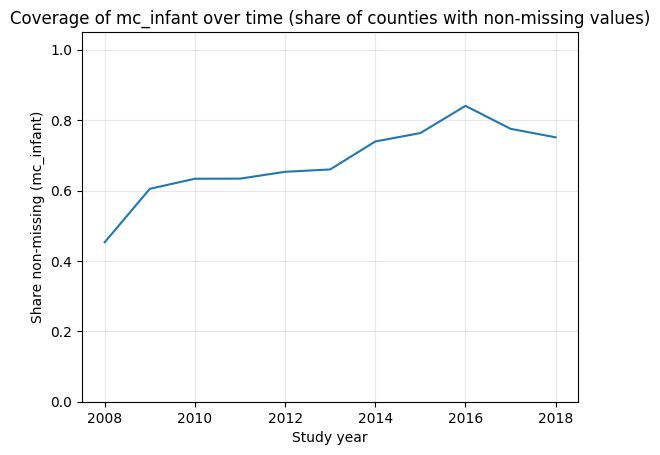

In [ ]:
import matplotlib.pyplot as plt

cost_col = "mc_infant"

coverage = (
    df.groupby("study_year")[cost_col]
      .apply(lambda s: s.notna().mean())
      .reset_index(name="share_non_missing")
)

plt.figure()
plt.plot(coverage["study_year"], coverage["share_non_missing"])
plt.title("Coverage of mc_infant over time (share of counties with non-missing values)")
plt.xlabel("Study year")
plt.ylabel("Share non-missing (mc_infant)")
plt.ylim(0, 1.05)
plt.grid(True, alpha=0.3)
plt.show()

We find that data coverage varies noticeably over time with earlier years having fewer counties reporting costs which may affect comparisons across years.


## 3.Trends in the national county-level median costs for three age groups (2008-2018)

This EDA figure summarizes yearly childcare costs by computing the median across all counties for mc_infant, mc_toddler, and mc_preschool. Using medians makes the trend less sensitive to extreme county values and better reflects the typical county each year.

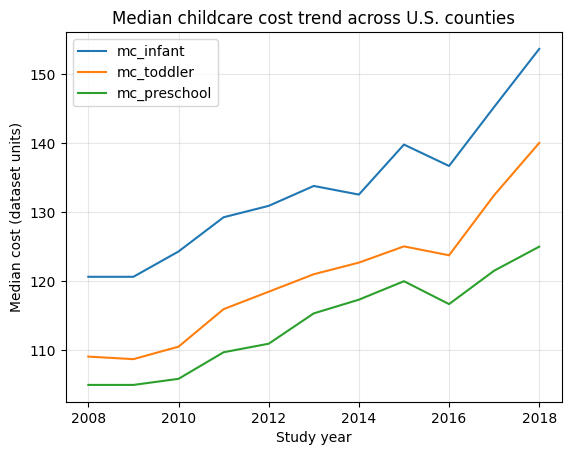

In [ ]:
cost_cols = ["mc_infant", "mc_toddler", "mc_preschool"]

trend = (
    df.groupby("study_year")[cost_cols]
      .median(numeric_only=True)
      .reset_index()
)

plt.figure()
for c in cost_cols:
    plt.plot(trend["study_year"], trend[c], label=c)
plt.title("Median childcare cost trend across U.S. counties")
plt.xlabel("Study year")
plt.ylabel("Median cost (dataset units)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

By obeserving these three lines, we want to learn whether costs rise overall, which age group increases fastest, and whether the gaps between age groups widen or narrow over time.

## 4.Histogram of the 2018 mc_infant distribution

This EDA plot focuses on a single cross-section (2018) and visualizes the county-level distribution of mc_infant after dropping missing values. The histogram reveals the shape of the data (e.g., skewness and long tails) and whether a small number of counties have unusually high costs compared with the rest. By pairing the plot with summary percentiles, we can set data-driven thresholds to flag potential outliers/extreme counties for deeper follow-up analysis.

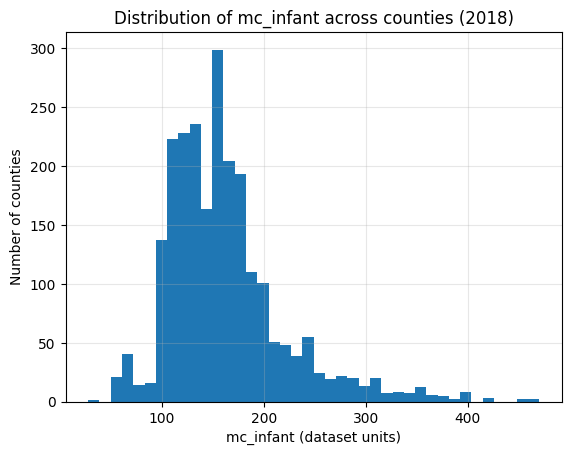

In [ ]:
latest_year = int(df["study_year"].max())
df_latest = df[df["study_year"] == latest_year].copy()

vals = df_latest["mc_infant"].dropna()

plt.figure()
plt.hist(vals, bins=40)
plt.title(f"Distribution of mc_infant across counties ({latest_year})")
plt.xlabel("mc_infant (dataset units)")
plt.ylabel("Number of counties")
plt.grid(True, alpha=0.3)

The distribution is right skewed with most counties clustered at lower cost levels and a small number of counties facing very high childcare costs.


## 5.Inter-state differences (2018: state-level median of county costs, Top 15)

This EDA figure aggregates the 2018 data by computing, for each state_abbreviation, the median mc_infant across counties within that state, then ranks states from highest to lowest. This shifts the data from a noisy county-level view to a more interpretable state-level summary, highlighting which states are typically more expensive. The spread among the top 15 states provides a clear picture of structured variability across states and motivates follow-up questions about regional drivers.

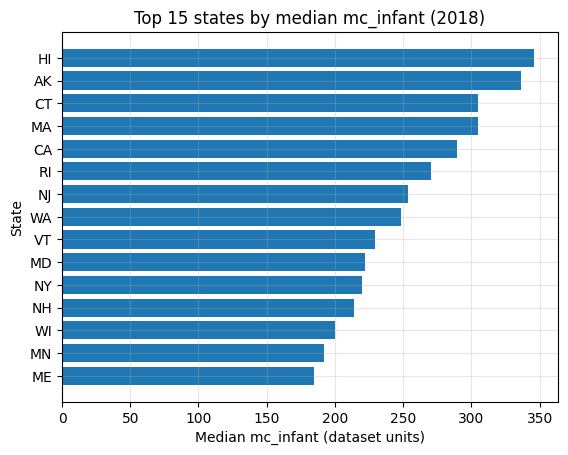

In [ ]:
state_median = (
    df_latest.groupby("state_abbreviation")["mc_infant"]
             .median()
             .sort_values(ascending=False)
)

top15 = state_median.head(15)[::-1]

plt.figure()
plt.barh(top15.index, top15.values)
plt.title(f"Top 15 states by median mc_infant ({latest_year})")
plt.xlabel("Median mc_infant (dataset units)")
plt.ylabel("State")
plt.grid(True, alpha=0.3)

We find that the most expensive counties are concentrated in a small number of regions which indicates that extreme childcare costs are geographically clustered rather than widespread.


## 6.Scatter plot of mc_infant vs. median household income (2018)

This EDA plot uses the 2018 county-level records with non-missing mc_infant and mhi_2018 to examine how childcare costs co-move with household income. Each point is a county, and the fitted line provides a visual summary of the overall trend. We also compute the Pearson correlation to quantify the strength of this relationship, helping assess whether higher-income counties tend to face higher infant childcare costs and which counties may deviate from the pattern.

Correlation (mhi_2018, mc_infant): 0.6800918362697004


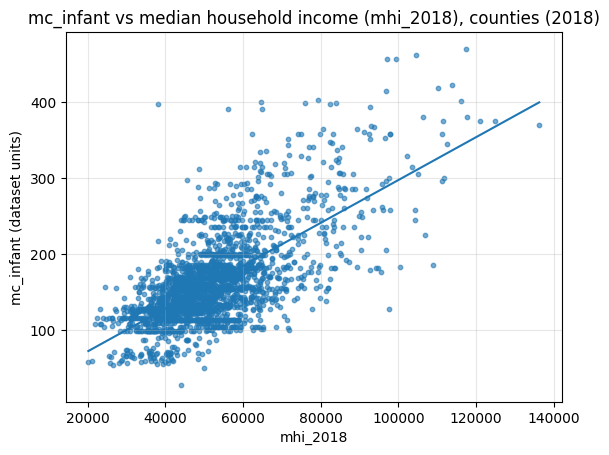

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

scatter_df = df_latest[["mc_infant", "mhi_2018"]].dropna()
x = scatter_df["mhi_2018"].astype(float)
y = scatter_df["mc_infant"].astype(float)

plt.figure()
plt.scatter(x, y, s=10, alpha=0.6)
plt.title(f"mc_infant vs median household income (mhi_2018), counties ({latest_year})")
plt.xlabel("mhi_2018")
plt.ylabel("mc_infant (dataset units)")
plt.grid(True, alpha=0.3)


if len(scatter_df) > 2:
    coef = np.polyfit(x, y, 1)
    x_line = np.linspace(x.min(), x.max(), 200)
    y_line = coef[0] * x_line + coef[1]
    plt.plot(x_line, y_line)


corr = scatter_df.corr(numeric_only=True).loc["mhi_2018", "mc_infant"]
print("Correlation (mhi_2018, mc_infant):", float(corr))

From this chart, we find that higher income counties tend to have higher childcare costs.


# **Domain Questions**

## **Q1. County childcare burden archetypes across age groups** ##


**In 2018 and maybe and across other years, do U.S. counties fall into a few clear “childcare burden groups” when we look at infant, toddler, and preschool costs together with local income and economic conditions? Where are these groups most common within a state and across different states?**

  
  •	Our EDA shows that there is a wide dispersion in county childcare costs and clear differences in state-level medians, suggesting differentiation rather than a single national pattern. There is a strong cost-income association implies counties may cluster into conditions like high-cost/high-income vs. high-cost/low-income. The decision value is in designing tiered subsidy or supply interventions tailored to county types, instead of using uniform thresholds. A surprising result we consider is that counties do not form stable, interpretable profiles despite large variability and state differences.

# **Q2. High-burden outliers relative to comparable counties**
**Which counties have childcare costs that are much higher than other counties with similar income levels? Do these high-cost counties stay expensive over time, or do they only appear in certain years between 2008 and 2018?**

Our EDA shows a long right tail in childcare costs, meaning most counties have moderate costs, but a small number have extremely high costs. This suggests that the highest-cost counties may be very different from typical counties. Because childcare cost usually rises when income rises, the most important unusual cases are counties that are more expensive than expected for their income level. For example, some counties may have a very high childcare cost burden even though their income is not very high.

It is also important to check if these unusual counties stay expensive year after year, or if they only spike in certain years between 2008 and 2018. This helps decide whether we need long-term policies or short-term support. The most surprising result would be if these “outlier” counties disappear after we compare them with similar counties. That would suggest the differences may come from local conditions, not a long-term structural problem.

# **Q3.  Trajectory types of childcare cost growth (2008-2018) and who experiences them**
**For counties that have enough data across multiple years, do childcare costs from 2008 to 2018 follow a few common patterns, such as steady increases, sudden jumps, sharp rises, or almost no change?**

• From our EDA, we see there is a strong time trends and age group differences, and so we emphasize the importance of looking at trends over time rather than focusing on single years. Our approach to analyzing each county's multi-year series as a "trajectory" allows us to group similar ones together and also helps us with forward-looking risk identification. The decision relevance here is to anticipate where these affordability issues are increasing most rapidly and to focus on earlier interventions. A surprising finding is if the trajectories were very idiosyncratic and had no recurring types.

## **Q4. Is childcare cost structure primarily state-driven or market-driven?** ##


**After we account for differences in income and other local conditions, do counties within the same state still look more similar to each other in childcare cost levels, cost burden, and cost trends than counties in different states? If so, what does this tell us about how much state policies matter compared to local county factors?**

  
  •	The EDA shows there is the large state-to-state variations in median infant costs, there is also a strong relationship between costs and income, which could be state-independent. We can use someway to see whether counties are more similar inside the same state or across different states. This helps us test if state borders matter, or if childcare costs are shaped more by regional markets that cross state lines.
  
  A very interesting result would be if counties in different states are more similar than counties within the same state. This would suggest that state policies may not be the main reason childcare costs change. Instead, it may mean that local economic conditions, regional labor markets, and childcare supply factors are stronger drivers than state boundaries.


